\begin{cases}
u' = 998u + 1998v \\
v' = -999u - 1999v
\end{cases}

$$u(0) = v(0) = 1$$

In [104]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from scipy import optimize

def f(u):
    f1 = 998*u[0] + 1998*u[1]
    f2 = -999*u[0] - 1999*u[1]
    return (np.array([f1, f2]))

def euler(u0, tau, T):
    N = int(round(T/tau))
    ts = np.linspace(0, N*tau, N + 1)
    u = np.zeros((N + 1, 2))
    u[0] = np.array(u0)
    for n in range(N):
        u[n+1] = u[n] + tau*f(u[n])
    return u, ts

def explicit(u0, tau, T):
    N = int(round(T/tau))
    ts = np.linspace(0, N*tau, N + 1)
    def k1(y):
        k1 = f(y)
        return k1
    def k2(y):
        k2 = f(y + 0.5*tau*k1(y))
        return k2
    def k3(y):
        k3 = f(y + 0.5*tau*k2(y))
        return k3
    def k4(y):
        k4 = f(y + tau*k3(y))
        return k4
    u = np.zeros((N + 1, 2))
    u[0] = np.array(u0)
    for n in range(N):
        u[n+1] = u[n] + 1.0/6 * tau * (k1(u[n]) + 2*k2(u[n]) + 2*k3(u[n]) + k4(u[n]))
    return u, ts

def implicit(u0, tau, T):
    N = int(round(T/tau))
    ts = np.linspace(0, N*tau, N + 1)
    u = np.zeros((N + 1, 2))
    u[0] = np.array(u0)
    ks = np.array([0, 0, 0, 0, 0, 0])
    def phi(k, y):
        k1 = np.array([k[0], k[1]])
        k2 = np.array([k[2], k[3]])
        k3 = np.array([k[4], k[5]])
        c1 = k1 - f(y + 1.0/3 * tau * k1)
        c2 = k2 - f(y + 1.0/3 * tau *(k1 + 2*k2))
        c3 = k3 - f(y + tau*k3)
        return np.concatenate((c1, c2, c3))
    for n in range(N):
        k = scipy.optimize.fsolve(phi, ks, args = u[n])
        k1 = np.array([k[0], k[1]])
        k2 = np.array([k[2], k[3]])
        k3 = np.array([k[4], k[5]])
        u[n+1] = u[n] + 1.0/4 *tau*(3*k1 + 3*k2 - 2*k3)
        ks = np.array(k)
    return u, ts

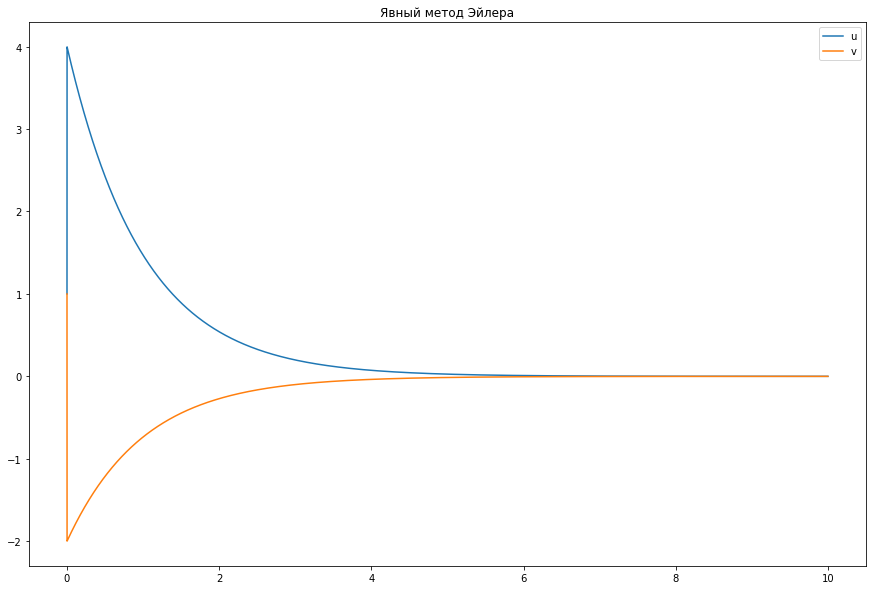

In [110]:
u, ts = euler([1, 1], 0.001, 10)
plt.figure(figsize = (15, 10))
plt.plot(ts, u[:, 0], label = 'u')
plt.plot(ts, u[:, 1], label = 'v')
plt.title('Явный метод Эйлера')
plt.legend()
plt.show()

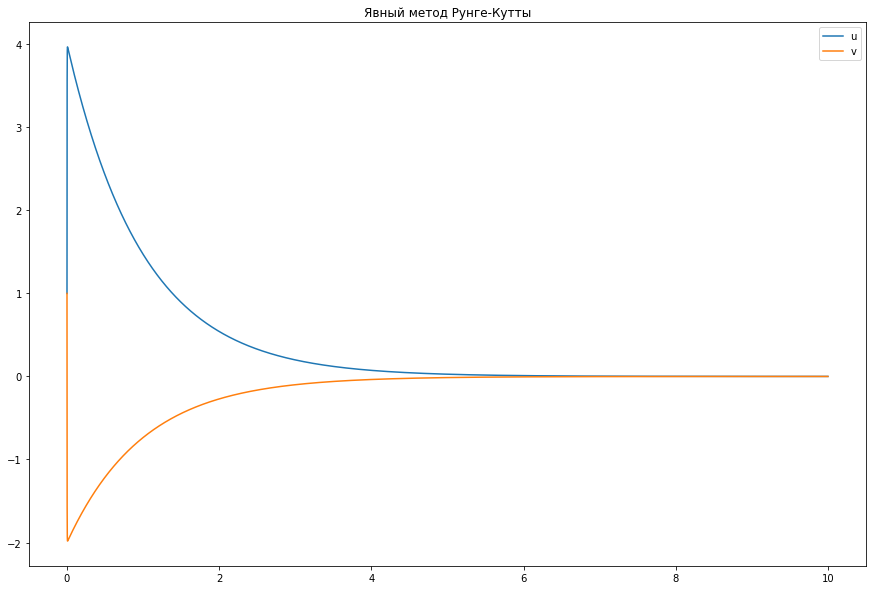

In [112]:
u, ts = explicit([1, 1], 0.001, 10)
plt.figure(figsize = (15, 10))
plt.plot(ts, u[:, 0], label = 'u')
plt.plot(ts, u[:, 1], label = 'v')
plt.title('Явный метод Рунге-Кутты')
plt.legend()
plt.show()

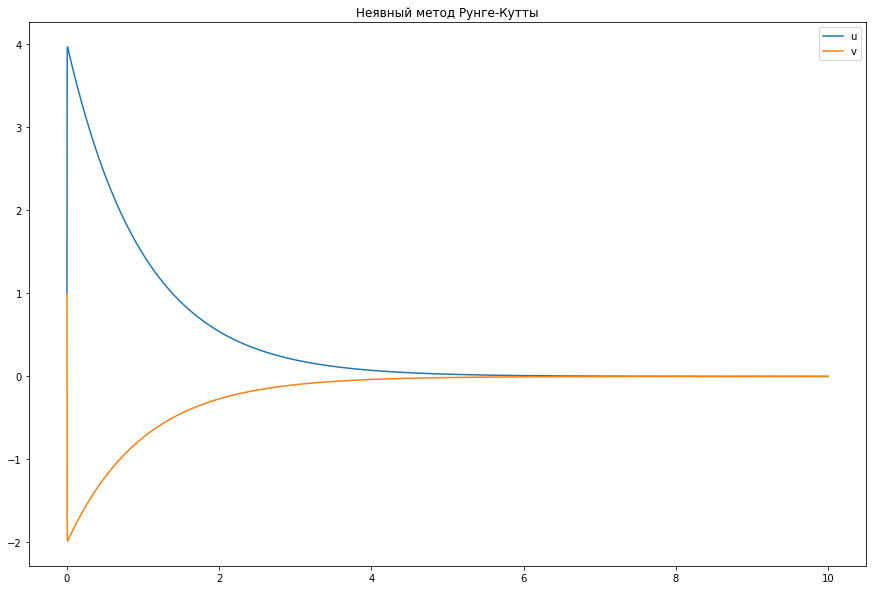

In [107]:
u, ts = implicit([1, 1], 0.001, 10)
plt.figure(figsize = (15, 10))
plt.plot(ts, u[:, 0], label = 'u')
plt.plot(ts, u[:, 1], label = 'v')
plt.title('Неявный метод Рунге-Кутты')
plt.legend()
plt.show()

Для метода Эйлера размер сетки определяется условием $|1 + \tau \lambda_i|\leq 1$, поэтому если использовать шаг $\frac{1}{e^2}$, то решения будут возрастать (т.к. показатель экспонены будет > 1), соответственно метод разойдётся.

Для метода Рунге-Кутты размер сетки определяется из условия $|R(\tau \lambda_i)| \leq 1, R(z) = \dfrac{det(E - zA + zeb^T)}{det(E - zA)}$, и если использовать предложенный шаг, то опять произойдёт экспоненциальное возрастание решений, то есть опять метод разойдётся.